### DS2500: Intermediate Programming with Data (Prof. Rachlin)
HW1: The Challenger Accident (Part A)


In [7]:
import pandas as pd

# Read temperature data for 1986
temps = pd.read_csv('temp_1986.csv', names=['station', 'wban','month','day','F'])

# Filter temperature records for January
#temps_jan = temps.loc[(temps['month']==1)]
temps = temps[temps.month==1]

# Delete columns we no longer need
#del temps_jan['wban']
#del temps_jan['month']
temps = temps.drop(columns=['wban', 'month'])


temps



,station,day,F
0,10010.0,1,17.2
1,10010.0,2,12.1
2,10010.0,3,10.4
3,10010.0,4,17.4
4,10010.0,5,26.5
...,...,...,...
2436571,NaN,27,63.1
2436572,NaN,28,59.6
2436573,NaN,29,57.7
2436574,NaN,30,60.4


In [8]:
# Read station data
stations = pd.read_csv('stations.csv', names=['station', 'wban', 'lat', 'lon'])


# Filter rows with missing values in any column
#missing_data_rows = stations.index[stations.isnull().any(axis=1)]
#stations.drop(missing_data_rows, 0, inplace=True)
stations = stations.dropna()
stations = stations.drop_duplicates(subset='station')


# Merge (join) station and temperature data using the station identifier
merged = pd.merge(stations, temps, on='station')
merged



,station,wban,lat,lon,day,F
0,35963.0,35048.0,52.133,1.433,2,42.3
1,35963.0,35048.0,52.133,1.433,3,38.1
2,35963.0,35048.0,52.133,1.433,4,33.7
3,35963.0,35048.0,52.133,1.433,5,37.7
4,35963.0,35048.0,52.133,1.433,6,34.5
...,...,...,...,...,...,...
29942,984280.0,41224.0,14.500,120.900,27,79.6
29943,984280.0,41224.0,14.500,120.900,28,79.8
29944,984280.0,41224.0,14.500,120.900,29,82.1
29945,984280.0,41224.0,14.500,120.900,30,83.2


In [9]:
# Haversine function

import math

def haversine(lat1, lon1, lat2, lon2):

    radius_earth = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius_earth * c

    return d

def distance_to_cape(lat, lon):
    return haversine(lat, lon, 28.396937, -80.605659)



In [10]:
distance_to_cape(28,-80)

73.9654553295124

In [11]:
# Compute weighting factors.
# Filter for stations with 100 km from the cape

max_distance = 100 # km
merged['distance'] = merged.apply(lambda row : 
                                  distance_to_cape(row['lat'], row['lon']), axis = 1) 


merged['inv_distance'] = 1.0 / merged['distance']
merged['weighted_F'] = merged['F'] * merged['inv_distance']
cape_stations = merged[merged.distance <= max_distance]

cape_stations


,station,wban,lat,lon,day,F,distance,inv_distance,weighted_F
3581,722040.0,12838.0,28.101,-80.644,1,65.0,33.120305,0.030193,1.962542
3582,722040.0,12838.0,28.101,-80.644,2,67.1,33.120305,0.030193,2.025948
3583,722040.0,12838.0,28.101,-80.644,3,64.5,33.120305,0.030193,1.947446
3584,722040.0,12838.0,28.101,-80.644,4,67.6,33.120305,0.030193,2.041044
3585,722040.0,12838.0,28.101,-80.644,5,63.0,33.120305,0.030193,1.902156
...,...,...,...,...,...,...,...,...,...
28519,747950.0,12867.0,28.233,-80.600,27,51.8,18.237378,0.054832,2.840321
28520,747950.0,12867.0,28.233,-80.600,28,39.6,18.237378,0.054832,2.171365
28521,747950.0,12867.0,28.233,-80.600,29,48.4,18.237378,0.054832,2.653890
28522,747950.0,12867.0,28.233,-80.600,30,57.6,18.237378,0.054832,3.158349


In [12]:
# Compute temperatures day by day

daily_temp = cape_stations.groupby(['day']).sum() #.loc[:,['inv_distance','weighted_F']]
daily_temp['est_F'] = daily_temp.weighted_F / daily_temp.inv_distance
daily_temp

,station,wban,lat,lon,F,distance,inv_distance,weighted_F,est_F
day,,,,,,,,,
1,5802295.0,102790.0,227.446,-647.237,465.5,481.029295,0.190596,11.712073,61.449679
2,5802295.0,102790.0,227.446,-647.237,477.1,481.029295,0.190596,12.124558,63.613863
3,5802295.0,102790.0,227.446,-647.237,469.7,481.029295,0.190596,11.782182,61.817522
4,5802295.0,102790.0,227.446,-647.237,490.4,481.029295,0.190596,12.330978,64.696886
5,5802295.0,102790.0,227.446,-647.237,450.3,481.029295,0.190596,11.280580,59.185766
6,5802295.0,102790.0,227.446,-647.237,388.7,481.029295,0.190596,9.850786,51.684072
7,5802295.0,102790.0,227.446,-647.237,449.1,481.029295,0.190596,11.512231,60.401169
8,5802295.0,102790.0,227.446,-647.237,448.1,481.029295,0.190596,11.402495,59.825421
9,5802295.0,102790.0,227.446,-647.237,464.8,481.029295,0.190596,11.776939,61.790012


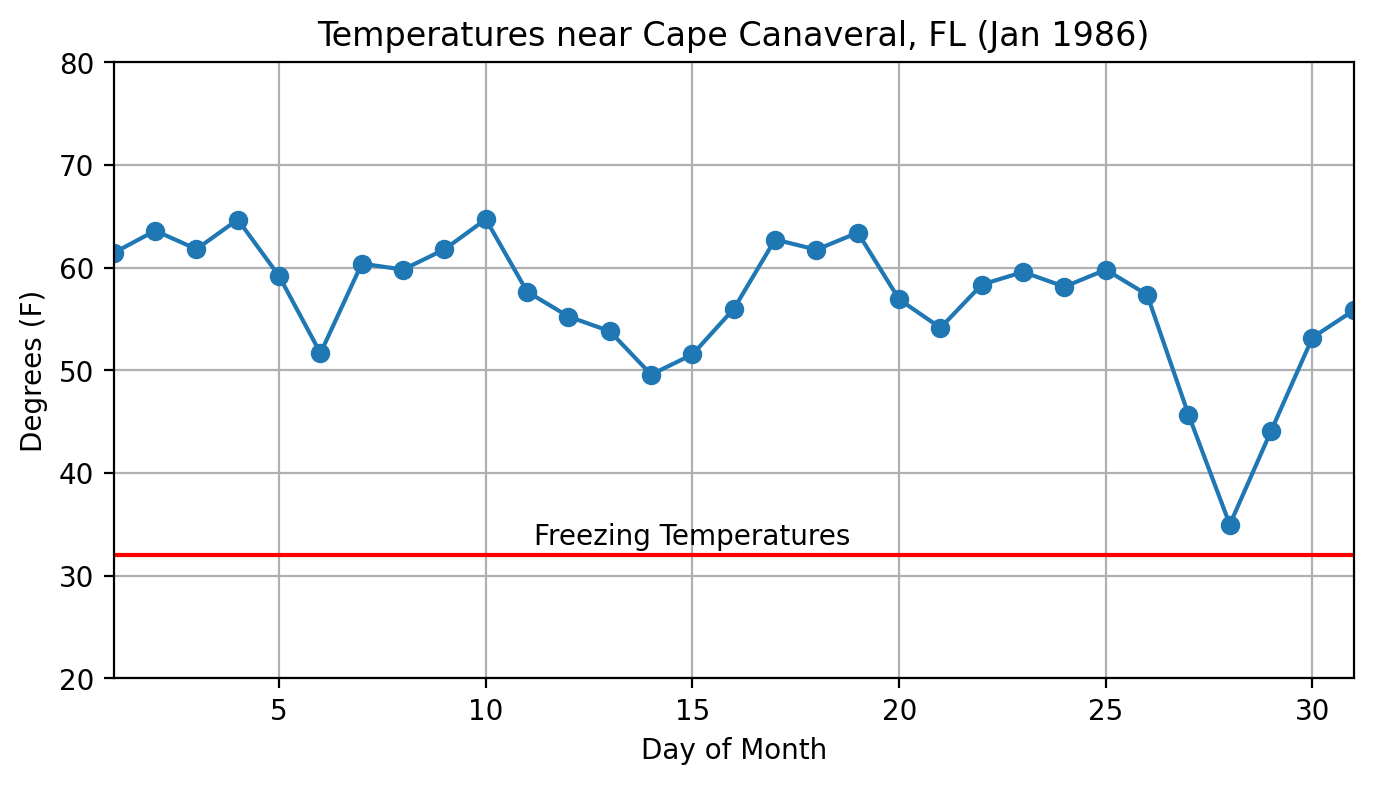

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4), dpi=200)
plt.title("Temperatures near Cape Canaveral, FL (Jan 1986)")
plt.xlabel("Day of Month")
plt.ylabel("Degrees (F)")
plt.ylim(20,80)
plt.xlim(1,31)
plt.grid()
plt.plot(daily_temp.est_F.index, daily_temp.est_F.values, marker='o')
plt.plot([0,31], [32,32], c='red')
plt.text(15,33, 'Freezing Temperatures', ha='center')
plt.show()

In [14]:
import sqlite3
import pandas as pd

In [15]:
# Make the connection
con = sqlite3.connect('weather.db')

In [16]:
query = """

select day, avg(F) as est_F
from stations s join temps t using (station)
where station <> '' 
and lat != '' and lat != 0 and lon != '' and lon != 0
and lat between 28.0 and 28.8
and lon between -80.8 and -80.4
and month = 1
group by day
order by day

"""

In [17]:
# Execute the query and convert to dataframe
daily_temp_db = pd.read_sql_query(query, con)
daily_temp_db

,day,est_F
0,1,65.328571
1,2,68.242857
2,3,65.857143
3,4,68.971429
4,5,63.100000
5,6,54.342857
6,7,64.814286
7,8,64.457143
8,9,66.271429
9,10,69.457143


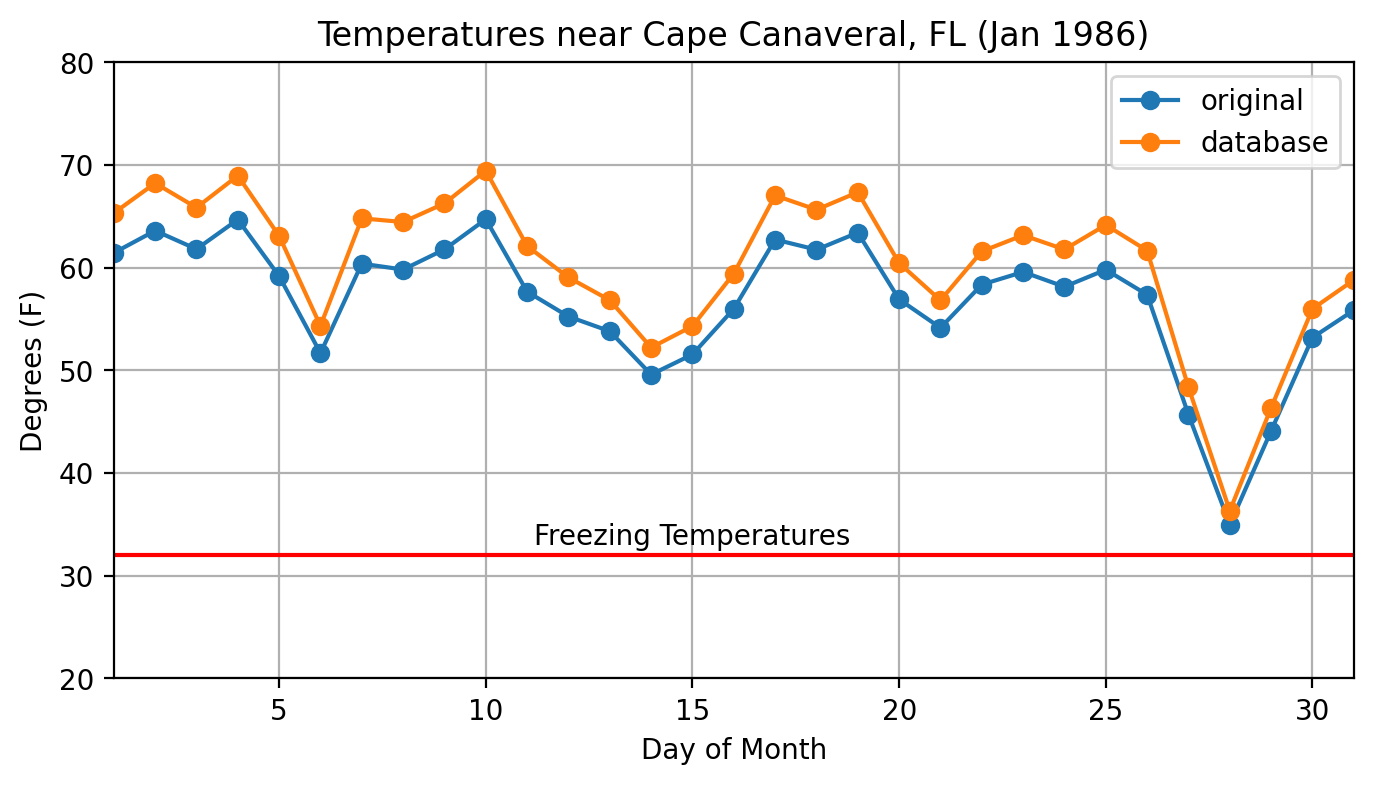

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4), dpi=200)
plt.title("Temperatures near Cape Canaveral, FL (Jan 1986)")
plt.xlabel("Day of Month")
plt.ylabel("Degrees (F)")
plt.ylim(20,80)
plt.xlim(1,31)
plt.grid()
plt.plot(daily_temp.index, daily_temp.est_F.values, marker='o', label='original')
plt.plot(daily_temp_db.day, daily_temp_db.est_F.values, marker='o', label='database')
plt.plot([0,31], [32,32], c='red')
plt.text(15,33, 'Freezing Temperatures', ha='center')
plt.legend()
plt.show()